# Clusters

É um grupo de elementos ou observações com características similares entre si. Sua identificação é possível, graças a combinação de fatores que se repete em cada conjunto de observações similares. Mas, diferente dos algoritmos supervisionados, em que criávamos labels para indicar o padrão que estavamos procurando, os algoritmos não supervisionados são capazes de aprender os padrões sem a necessidade de labels. Como isso acontece? Bem cada algoritmo tem uma forma particular de aprender e identificar os padrões nos dados. Veremos 2 tipos:

## K-Means Clustering

É um método de clusterização baseado em centróides (K-means), em que cada elemento do cluster tem como base a sua distância média de um dos centros determinados no momento de instanciar o modelo. Por exemplo n_clusters=2. Este número k, definido de antemão, será calculado por uma série de tentativas aleatórias o que minimiza a distância entre pontos no conjunto de dados e cada centro de cluster. O problema é conhecido como NP-hard e, portanto, as soluções são comumente aproximadas ao longo de uma série de tentativas. Porém o output do K-means será sempre catogórico: pertence a determinado cluster ou não sem a possibilidade de ambiguidades ou probabilidades.

A maior desvantagem dos algoritmos do tipo k-means é que eles exigem que o número de clusters k seja especificado com antecedência. Isso causa problemas para dados de clustering quando o número de clusters não pode ser conhecido de antemão. K-means também tem problemas para agrupar distribuições baseadas em densidade, como aquelas na imagem abaixo ou aquelas que não são lineares separáveis.

## Agglomerative Hierarchical Clustering

Os algoritmos de Hierarchical Clustering ou agrupamento hierárquico se enquadram em 2 categorias: top-down ou bottom-up. Algoritmos bottom-up ou ascendentes tratam cada ponto de dados como um único cluster no início e então mesclam (ou aglomeram) pares de clusters sucessivamente até que todos os clusters tenham sido mesclados em um único cluster que contém todos os pontos de dados. O agrupamento hierárquico bottom-up é, portanto, denominado agrupamento aglomerativo hierárquico ou HAC. Esta hierarquia de clusters é representada como uma árvore (ou dendrograma). A raiz da árvore é o único cluster que reúne todas as amostras, sendo as folhas os aglomerados com apenas uma amostra. Confira o gráfico abaixo 

Funcionamento do Agglomerative Hierarchical Clustering:

- Começamos tratando cada ponto de dados como um único cluster, ou seja, se houver X pontos de dados em nosso conjunto de dados, teremos X clusters. Em seguida, selecionamos uma métrica de distância que mede a distância entre dois clusters. Como exemplo, usaremos o average linkage, que define a distância entre dois clusters como a distância média entre os pontos de dados no primeiro cluster e os pontos de dados no segundo cluster.

- Em cada iteração, combinamos dois clusters em um. Os dois clusters a serem combinados são selecionados como aqueles com a menor ligação média. Ou seja, de acordo com nossa métrica de distância selecionada, esses dois clusters têm a menor distância entre si e, portanto, são os mais semelhantes e devem ser combinados.

- A etapa 2 é repetida até chegarmos à raiz da árvore, ou seja, temos apenas um cluster que contém todos os data points. Desta forma, podemos selecionar quantos clusters queremos no final, simplesmente escolhendo quando parar de combinar os clusters, ou seja, quando pararmos de construir a árvore!

O clustering hierárquico não exige que especifiquemos o número de clusters e podemos até selecionar qual número de clusters parece melhor, já que estamos construindo uma árvore. Além disso, o algoritmo não é sensível à escolha da métrica de distância; todos eles tendem a funcionar igualmente bem, enquanto com outros algoritmos de agrupamento, a escolha da métrica de distância é crítica.

Um caso de uso particularmente bom de métodos de agrupamento hierárquico é quando os dados subjacentes têm uma estrutura hierárquica e você deseja recuperar a hierarquia; outros algoritmos de agrupamento não podem fazer isso

# Mão na Massa

#### K-Means Clustering
Vamos trabalhar em um problema de segmentação de clientes de varejo.
O objetivo desse dataset é segmentar os clientes de um varejista com base em seus gastos anuais em diversas categorias de produtos, como leite, mercearia, região, etc. Então, vamos começar!
Antes de tudo, vamos importar as bibliotecas:

In [2]:
# importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Aqui, vemos que há muita variação na magnitude dos dados. Variáveis ​​como Channel e Region têm magnitude baixa, enquanto variáveis ​​como Fresh, Milk, Grocery, etc. têm magnitude maior.

Sabemos que o K-Means é um algoritmo baseado em distância. Essas diferenças de magnitude podem criar um problema. Então, é imprescindível primeiro trazer todas as variáveis ​​para a mesma magnitude:

In [5]:
# padronizando os dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
# statisticas do dataset padronizado
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [6]:
# Instanciando o KMeans com o modo 'k-means++'
kmeans = KMeans(n_clusters=2, init='k-means++')
# fittando o k means nos dados padronizados
kmeans.fit(df_scaled)

KMeans(n_clusters=2)

Vamos avaliar o quão bem estão os clusters formados. Para fazer isso, vamos calcular a inércia dos clusters. A inércia é um indicativo de quão estáveis os clusters estão. Ou seja, caso eu promova mais n-iterações, quão diferentes os clusters vão ser entre si a cada nova rodada:

In [7]:
# inertia on the fitted data
kmeans.inertia_

2599.384423783626

Obtivemos um valor de inércia de quase 2600. Isso é bom? Não sabemos! Uma forma de avaliar isto é através do método elbow ou cotovelo. Em datasets com um número de clusters muito claros, o método registra uma queda significativa na inércia, formando um cotovelo no gráfico. Mais ou menos assim:

In [8]:
# Elbow

Agora, vamos ver como podemos usar a curva de cotovelo para determinar o número ideal de clusters no nosso dataset.
Vamos fazer um loop for para fittar diversos modelos KMeans, e, a cada modelo vamos aumentar o número de clusters. Vamos armazenar o valor de inércia de cada modelo e, em seguida, plotá-lo para visualizar o resultado:

In [10]:
# fittando vários modelos e armazenando a inércia em uma lista
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df_scaled)
    SSE.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

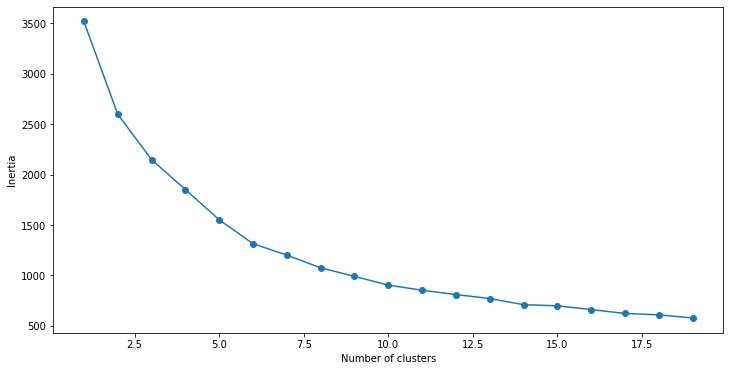

In [11]:
# convertendo os resultados em um dataframe e plotando
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Então podemos escolher qualquer número de clusters entre 5 e 8. Vamos definir o número de clusters como 6 e ajustar o modelo:

In [12]:
# vamos reinstanciar o nosso modelo, agora com 6 clusters 
kmeans = KMeans(n_clusters = 6, init='k-means++')
kmeans.fit(df_scaled)
pred = kmeans.predict(df_scaled)
# criamos um novo dataframe com os dados do df original 
# adicionamos a etiqueta dos clusters
df_final = pd.DataFrame(df)
df_final['cluster'] = pred
df_final['cluster'].value_counts()

1    174
2    124
0     86
3     44
4     11
5      1
Name: cluster, dtype: int64

Essa é a quantidade de observações para cada cluster. Vale ressaltar que ainda há uma inercia alta, então para cada vez que você rodar o modelo, vai haver uma leve mudança na quantidade e nas composições dos mode
Agora que temos os clusters, o que os diferencia?

In [13]:
df_final[df_final['cluster']==0]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
198,1,1,11686,2154,6824,3527,592,697,0
199,1,1,9670,2280,2112,520,402,347,0
202,1,1,25203,11487,9490,5065,284,6854,0
203,1,1,583,685,2216,469,954,18,0
204,1,1,1956,891,5226,1383,5,1328,0
...,...,...,...,...,...,...,...,...,...
332,1,2,22321,3216,1447,2208,178,2602,0
336,1,2,13970,1511,1330,650,146,778,0
337,1,2,9351,1347,2611,8170,442,868,0
338,1,2,3,333,7021,15601,15,550,0


## Hierarchical Clustering

Os clusters hierárquicos possuem uma característica peculiar: capturam a variação conjunta de elementos de um dataset e transforma essa covariância em uma relação hierárquica. Entre as diversas aplicações está a capacidade de clusterizar ações que oscilam juntas. Isto pode ser particularmente interessante para ajudar traders e investidores a formarem uma carteira variada.

Para poder ilustrar este exemplo, vamos usar dados de 60 ativos de empresas americanas referente ao período de 2010 a 2015. Primeiro vamos fazer as importações necessárias:

In [14]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
# Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster
df_stock = pd.read_csv('company-stock-movements-2010-2015-incl.csv')
df_stock.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


Para poder processar os nossos dados, vamos precisar extratir os valores do nosso dataframe das variáveis numéricas e transformá-los em uma array. Ao mesmo tempo, vamos precisar extrair o nome das empresas e armazenar em uma lista:

In [15]:
companies = df_stock.iloc[:,0].to_list()
movements = df_stock.drop(df_stock.columns[0], axis=1).values

Os algoritmos de clustering hierárquicos são sensíveis à distância, então para não deixar que eles sejam influenciados por diferentes escalas, mas apenas pelas variações, vamos precisar normalizar os nossos dados:

In [16]:
# Import normalize
from sklearn.preprocessing import normalize
# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

Agora conseguimos gerar uma visualização que irá nos dar um entendimento da formação dos clusters hierárquicos:

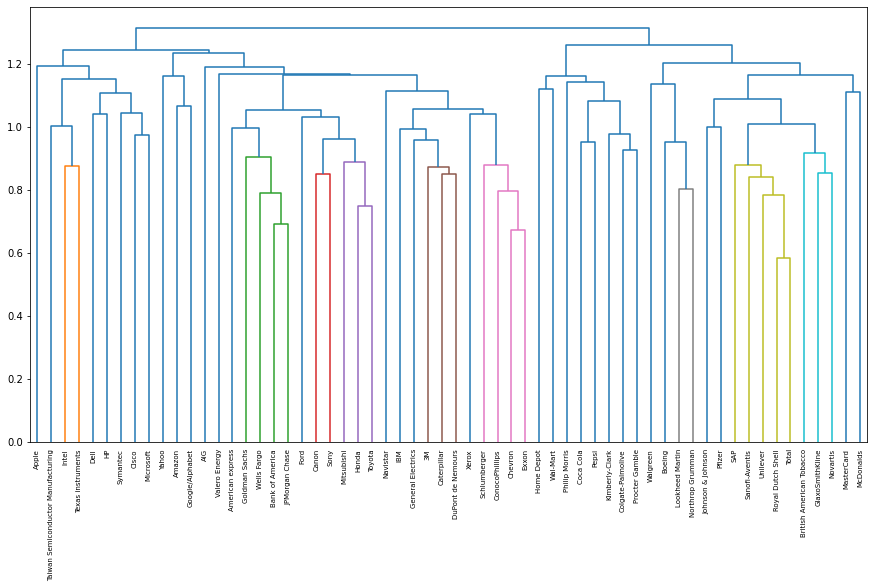

In [18]:
# set the fig size
fig= plt.figure(figsize=(15,8))
# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')
# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=7
            )
plt.show()

WOW! Olha o link entre a variação dos papéis de todas estas empresas!


Agora precisamos extrair os clusters para fazer as nossas recomendações.
Para isso, precisamos estabelecer o limite de corte da nossa árvore. Na parte de baixo temos todas as empresas ou folhas. Se fizermos um corte em 0.5 por exemplo, teremos 60 clusters. Um para cada empresa. Se fizermos acima de 1.4 teremos apenas um grande cluster com as 60 empresas. Precisamos estabelecer um corte que otimize e capture o que estamos buscando (a covariância dos ativos).

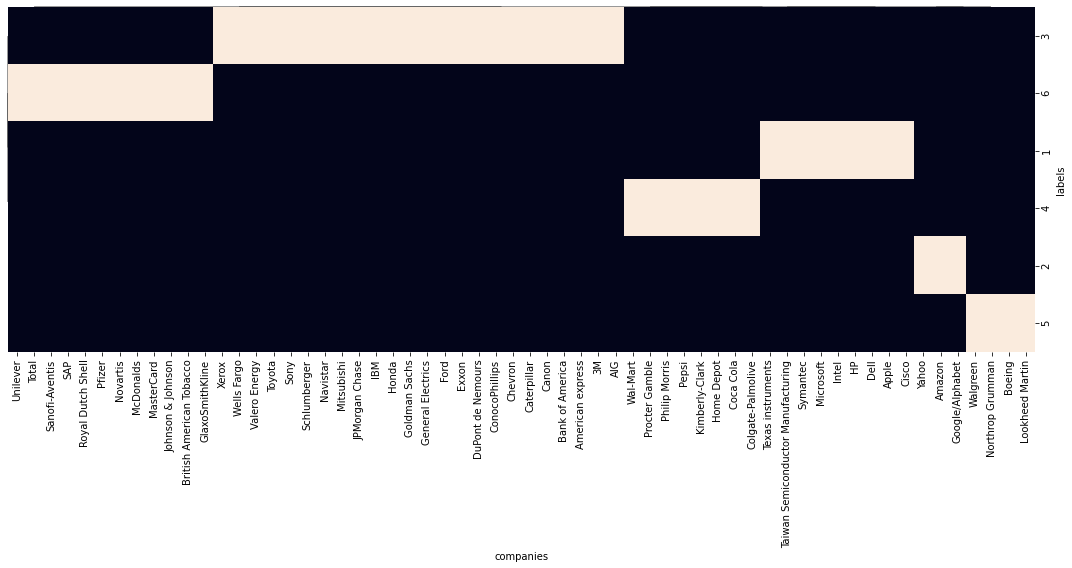

In [20]:
# fazendos as importações necessárias
from scipy.cluster.hierarchy import fcluster
import seaborn as sns
# Escolhendo o ponto de corte da nossa árvore do dendrograma
# Faça uma alteração nesse valor mudam os clusters
labels = fcluster(mergings, 1.2, criterion='distance' )
# criando um dataframe com as labes e as empresas= df
df = pd.DataFrame({'labels': labels, 'companies': companies})
# Criando uma crosstab: ct
ct = pd.crosstab(df['labels'], df['companies'])
# transformando a crosstab em um cluster map
sns.clustermap(ct, figsize=(15, 8), cbar_pos=None, dendrogram_ratio=0.001)


#### Etapas para realizar clustering hierárquico
A seguir estão as etapas envolvidas no agrupamento aglomerativo:

- No início, trate cada ponto de dados como um cluster. Portanto, o número de clusters no início será K, enquanto K é um número inteiro que representa o número de pontos de dados.
- Forme um cluster unindo os dois pontos de dados mais próximos, resultando em clusters K-1.
- Forme mais clusters unindo os dois clusters mais próximos, resultando em clusters K-2.
- Repita as três etapas acima até que um grande aglomerado seja formado.

Uma vez que o cluster único é formado, os dendrogramas são usados ​​para dividir em vários clusters, dependendo do problema. Estudaremos o conceito de dendrograma em detalhes em uma próxima seção.
Existem diferentes maneiras de encontrar a distância entre os clusters. A distância em si pode ser a distância euclidiana ou de Manhattan. A seguir estão algumas das opções para medir a distância entre dois clusters:

- Meça a distância entre os pontos próximos de dois clusters.
- Meça a distância entre os pontos mais distantes de dois grupos.
- Meça a distância entre os centróides de dois clusters.
- Meça a distância entre todas as combinações possíveis de pontos entre os dois clusters e obtenha a média.

### Papel dos dendrogramas para agrupamento hierárquico

Na última seção, dissemos que, uma vez que um grande cluster é formado pela combinação de pequenos clusters, os dendrogramas do cluster são usados ​​para realmente dividir o cluster em vários clusters de pontos de dados relacionados. Vamos ver como isso realmente é feito.

Suponha que temos uma coleção de pontos de dados representados por uma numpymatriz da seguinte maneira:

In [21]:
import numpy as np

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

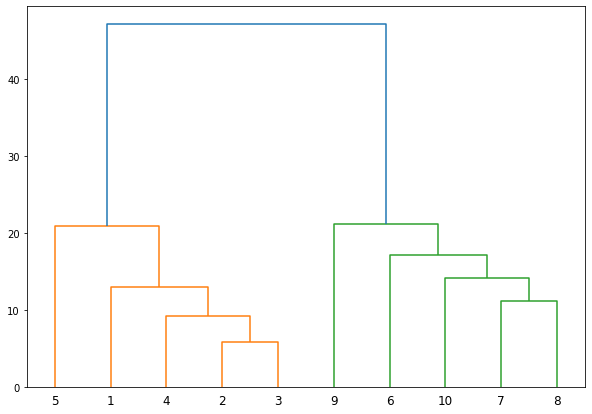

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 11)

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

O algoritmo começa encontrando os dois pontos mais próximos um do outro com base na distância euclidiana. Se olharmos novamente para o Gráfico 1, podemos ver que os pontos 2 e 3 estão mais próximos um do outro, enquanto os pontos 7 e 8 estão próximos um do outro. Portanto, um cluster será formado entre esses dois pontos primeiro. No Gráfico 2, você pode ver que os dendogramas foram criados unindo os pontos 2 com 3 e 8 com 7. A altura vertical do dendograma mostra as distâncias euclidianas entre os pontos. No Gráfico 2, pode-se observar que a distância euclidiana entre os pontos 8 e 7 é maior do que a distância entre os pontos 2 e 3.

O próximo passo é juntar o cluster formado pela junção de dois pontos ao próximo cluster mais próximo ou ponto que por sua vez resulta em outro cluster. Se você olhar para o gráfico 1, o ponto 4 está mais próximo do agrupamento dos pontos 2 e 3, portanto, no gráfico 2 o dendrograma é gerado unindo o ponto 4 com o dendrograma dos pontos 2 e 3. Este processo continua até que todos os pontos sejam unidos para formar um grande grupo.

Uma vez que um grande aglomerado é formado, a distância vertical mais longa sem nenhuma linha horizontal passando por ele é selecionada e uma linha horizontal é desenhada através dele. O número de linhas verticais que essa linha horizontal recém-criada passa é igual ao número de clusters.

In [31]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [32]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

No código acima, importamos a AgglomerativeClusteringclasse da biblioteca "sklearn.cluster". O número de parâmetros é definido como 2 usando o n_clustersparâmetro enquanto o affinityé definido como "euclidiano" (distância entre os pontos de dados). Finalmente, o linkageparâmetro é definido como "ward", o que minimiza a variante entre os clusters.

Em seguida, chamamos o fit_predictmétodo da AgglomerativeClusteringvariável de classe cluster. Este método retorna os nomes dos clusters aos quais cada ponto de dados pertence. Execute o seguinte script para ver como os pontos de dados foram agrupados.

In [33]:
print(cluster.labels_)


[1 1 1 1 1 0 0 0 0 0]


A saída é uma matriz unidimensional de 10 elementos correspondentes aos clusters atribuídos aos nossos 10 pontos de dados.

[1 1 1 1 1 0 0 0 0]

Como esperado, os primeiros cinco pontos foram agrupados enquanto os últimos cinco pontos foram agrupados. É importante mencionar aqui que esses uns e zeros são meramente rótulos atribuídos aos clusters e não têm implicações matemáticas.

## Shopping Data

In [34]:
customer_data = pd.read_csv('shopping-data.csv')


In [35]:
customer_data.shape

(200, 5)

In [36]:
customer_data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [127]:
data = customer_data.iloc[:, 3:5]
data

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


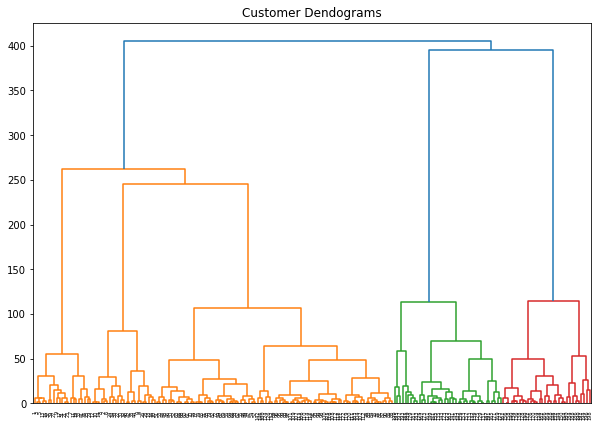

In [148]:
import scipy.cluster.hierarchy as shc
#plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

No script acima, importamos a classe de hierarquia da scipy.clusterbiblioteca como shc. A classe de hierarquia possui um dendrogrammétodo que obtém o valor retornado pelo linkagemétodo da mesma classe. O linkagemétodo usa o conjunto de dados e o método para minimizar distâncias como parâmetros. Usamos 'ward' como o, methoduma vez que minimiza as variações das distâncias entre os clusters.

In [39]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

Você pode ver os rótulos do cluster de todos os seus pontos de dados. Como temos cinco clusters, temos cinco rótulos na saída, ou seja, de 0 a 4.

Como uma etapa final, vamos representar graficamente os clusters para ver como realmente nossos dados foram agrupados

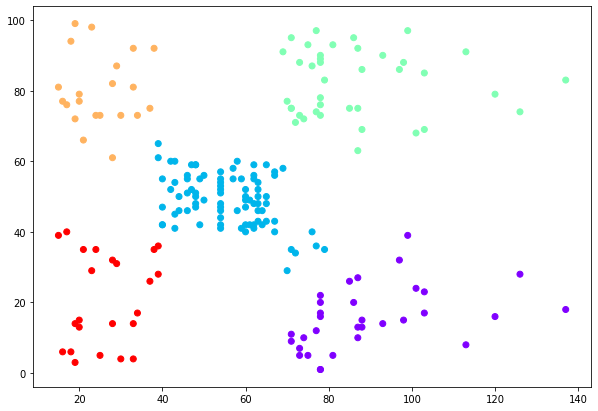

In [41]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

Você pode ver os pontos de dados na forma de cinco clusters. Os pontos de dados no canto inferior direito pertencem aos clientes com altos salários, mas baixos gastos. Esses são os clientes que gastam seu dinheiro com cuidado. Da mesma forma, os clientes no canto superior direito (pontos de dados verdes), são os clientes com altos salários e altos gastos. Esse é o tipo de cliente que as empresas visam. Os clientes no meio (pontos de dados azuis) são aqueles com renda e salários médios. O maior número de clientes pertence a esta categoria. As empresas também podem direcionar esses clientes, dado o fato de eles serem em grande número, etc.

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(data, cluster.labels_)

print("For n_clusters =", 5,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.5529945955148897


In [44]:
from sklearn.cluster import DBSCAN


In [144]:
DBS_clustering = DBSCAN(eps=0.09, min_samples=10).fit(df_norm)

DBSCAN_clustered = df_norm.copy()
labels = DBS_clustering.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [145]:
plt.scatter(data[:,0], data[:,1], c=labels, cmap='rainbow')

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [107]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

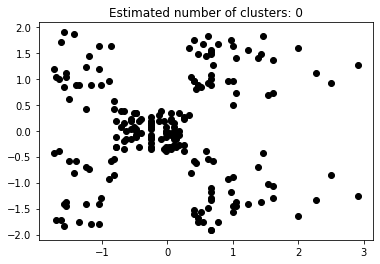

In [108]:

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()